<a href="https://colab.research.google.com/github/riszwinger/tensorflow_cert/blob/main/basic/MultiClass_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Library

In [28]:
import tensorflow as tf
import pathlib
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 2s 0us/step


In [3]:
!ls /root/.keras/datasets/flower_photos

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [4]:
!ls /root/.keras/datasets/

flower_photos  flower_photos.tar.gz


In [ ]:
data_dir = pathlib.Path(data_dir)


In [6]:
list(data_dir.glob("*/*.jpg"))[:3]

[PosixPath('/root/.keras/datasets/flower_photos/tulips/7266196114_c2a736a15a_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/4644110077_ff252cd7c4.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [9]:
len(list(data_dir.glob('roses/*.jpg')))

641

In [10]:
flower_list=['daisy' ,'dandelion', 'roses',  'sunflowers',  'tulips']
for i in flower_list:
  print('Number of {} is {}'.format(i,len(list(data_dir.glob(i+'/*.jpg')))))


Number of daisy is 633
Number of dandelion is 898
Number of roses is 641
Number of sunflowers is 699
Number of tulips is 799


In [12]:
list(data_dir.glob("*/*.jpg"))[0]

PosixPath('/root/.keras/datasets/flower_photos/tulips/7266196114_c2a736a15a_m.jpg')

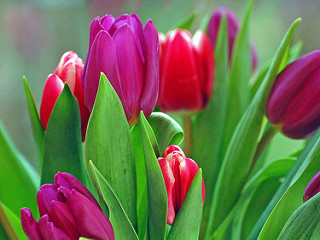

In [15]:
load_img(list(data_dir.glob("*/*.jpg"))[4])

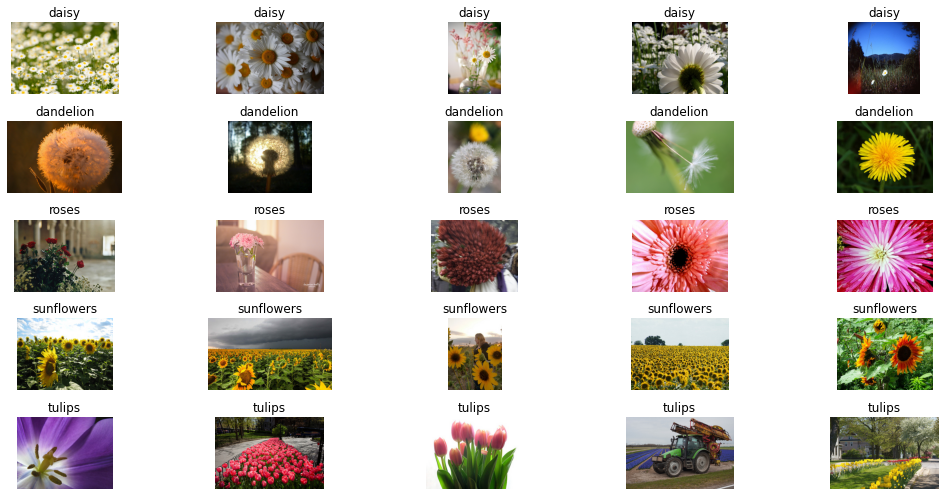

In [19]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def visualize_data(labels, dir, title):
    """
    Uses matplotlib to visualize PIL images
    :param labels (list) :  list of labels eg: ['cats','dogs']
    :param dir: path of files with labels as subfolders
    :param title: title of the plot
    :return: visualize 5 images from each label randomly
    """
    # labels=['horses','humans']
    num_class = len(labels)
    # train_dir="/tmp/horse-or-human/"
    fig, ax = plt.subplots(num_class, 5, figsize=(15, 7))
    for i in range(num_class):
        for j in range(5):
            img_list = (os.listdir(os.path.join(dir, labels[i])))
            img = img_list[random.randint(0, len(img_list))]
            ax[i, j].imshow(mpimg.imread(os.path.join(dir, labels[i], img)))
            ax[i, j].set_title(labels[i])
            ax[i, j].axis('off')
    #plt.suptitle(title)
    plt.tight_layout()
    plt.show()


# Example
labels=['daisy' ,'dandelion', 'roses',  'sunflowers',  'tulips']
dir=data_dir
title='Training Data'
visualize_data(labels,dir,title)

In [20]:
batch_size=32
img_height=180
img_width=180

In [21]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir,batch_size=batch_size,image_size=(img_height,img_width),seed=123,validation_split=0.2,subset='training')

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [22]:
valid_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir,batch_size=batch_size,image_size=(img_height,img_width),seed=123,validation_split=0.2,subset='validation')

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [24]:
type(train_ds),train_ds

(tensorflow.python.data.ops.dataset_ops.BatchDataset,
 <BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>)

In [26]:
class_names=train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


## Model Building

In [30]:
num_class=len(class_names)
model=Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255,input_shape=(img_height,img_width,3)) )
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(num_class))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 20, 64)       

In [32]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])

In [34]:
history=model.fit(train_ds,validation_data=valid_ds,epochs=10)

Epoch 1/10
92/92 [==============================] - 41s 118ms/step - loss: 1.6238 - acc: 0.3886 - val_loss: 1.1825 - val_acc: 0.5368
Epoch 2/10
92/92 [==============================] - 10s 101ms/step - loss: 1.0295 - acc: 0.5875 - val_loss: 0.9942 - val_acc: 0.5981
Epoch 3/10
92/92 [==============================] - 10s 101ms/step - loss: 0.8345 - acc: 0.6792 - val_loss: 0.9924 - val_acc: 0.5940
Epoch 4/10
92/92 [==============================] - 10s 101ms/step - loss: 0.6317 - acc: 0.7681 - val_loss: 1.1291 - val_acc: 0.5886
Epoch 5/10
92/92 [==============================] - 10s 101ms/step - loss: 0.4390 - acc: 0.8355 - val_loss: 1.1681 - val_acc: 0.6308
Epoch 6/10
92/92 [==============================] - 10s 110ms/step - loss: 0.2585 - acc: 0.9128 - val_loss: 1.5061 - val_acc: 0.5981
Epoch 7/10
92/92 [==============================] - 10s 104ms/step - loss: 0.1856 - acc: 0.9377 - val_loss: 1.9835 - val_acc: 0.5681
Epoch 8/10
92/92 [==============================] - 10s 101ms/step - 

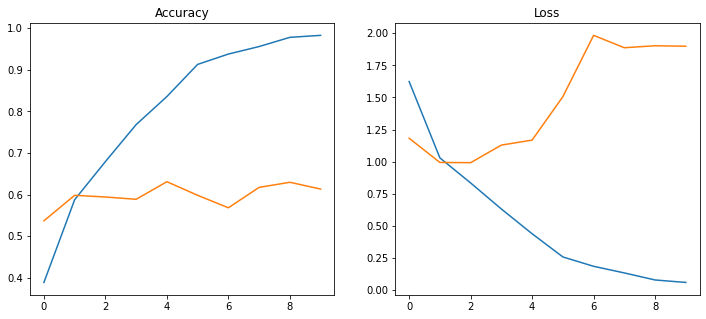

In [39]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
epochs=range(len(history.history['acc']))

ax[0].plot(epochs,history.history['acc'])
ax[0].plot(epochs,history.history['val_acc'])
ax[0].set_title('Accuracy')

ax[1].plot(epochs,history.history['loss'])
ax[1].plot(epochs,history.history['val_loss'])
ax[1].set_title('Loss')
plt.show()

## Looks like overfitting,lets try augmentation

In [40]:
num_class=len(class_names)
model1=Sequential()
model1.add(tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255,input_shape=(img_height,img_width,3)) )
model1.add(tf.keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"))
model1.add(tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3),width_factor=(0.2, 0.3),fill_mode='nearest'))
model1.add(tf.keras.layers.experimental.preprocessing.RandomRotation(factor=(-0.2, 0.3)))
model1.add(tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=(0.2, 0.3),width_factor=(0.2, 0.3),fill_mode='nearest'))
model1.add(Conv2D(16,(3,3),activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Conv2D(32,(3,3),activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Flatten())
model1.add(Dense(512,activation='relu'))
model1.add(Dense(num_class))
model1.summary()
model1.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])
history=model1.fit(train_ds,validation_data=valid_ds,epochs=20)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
random_flip (RandomFlip)     (None, 180, 180, 3)       0         
_________________________________________________________________
random_zoom (RandomZoom)     (None, 180, 180, 3)       0         
_________________________________________________________________
random_rotation (RandomRotat (None, 180, 180, 3)       0         
_________________________________________________________________
random_translation (RandomTr (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 89, 89, 16)       

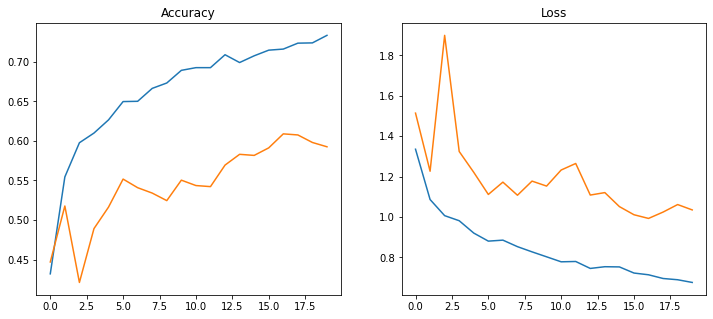

In [41]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
epochs=range(len(history.history['acc']))

ax[0].plot(epochs,history.history['acc'])
ax[0].plot(epochs,history.history['val_acc'])
ax[0].set_title('Accuracy')

ax[1].plot(epochs,history.history['loss'])
ax[1].plot(epochs,history.history['val_loss'])
ax[1].set_title('Loss')
plt.show()

## Little better but still not great :(

**Trying**
- Dropout
- rescaling later
- Increasing epcohs to 50

In [42]:
num_class=len(class_names)
model2=Sequential()
model2.add(tf.keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal",input_shape=(img_height,img_width,3)))
model2.add(tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3),width_factor=(0.2, 0.3),fill_mode='nearest'))
model2.add(tf.keras.layers.experimental.preprocessing.RandomRotation(factor=(-0.2, 0.3)))
model2.add(tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=(0.2, 0.3),width_factor=(0.2, 0.3),fill_mode='nearest'))
model2.add(tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255) )
model2.add(Conv2D(16,(3,3),activation='relu'))
model2.add(MaxPool2D(2,2))
model2.add(Conv2D(32,(3,3),activation='relu'))
model2.add(MaxPool2D(2,2))
model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(512,activation='relu'))
model2.add(Dense(num_class))
model2.summary()
model2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])
history=model2.fit(train_ds,validation_data=valid_ds,epochs=50)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_1 (RandomFlip)   (None, 180, 180, 3)       0         
_________________________________________________________________
random_zoom_1 (RandomZoom)   (None, 180, 180, 3)       0         
_________________________________________________________________
random_rotation_1 (RandomRot (None, 180, 180, 3)       0         
_________________________________________________________________
random_translation_1 (Random (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 89, 89, 16)       

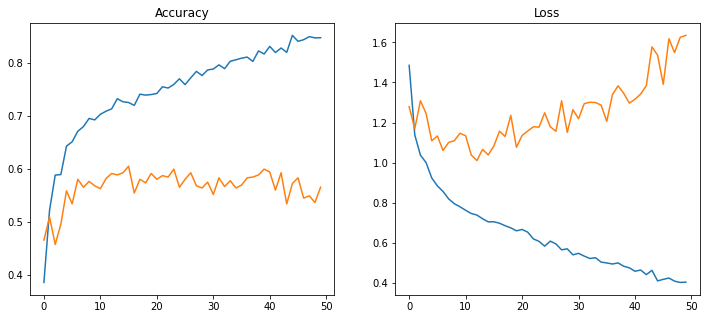

In [43]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
epochs=range(len(history.history['acc']))

ax[0].plot(epochs,history.history['acc'])
ax[0].plot(epochs,history.history['val_acc'])
ax[0].set_title('Accuracy')

ax[1].plot(epochs,history.history['loss'])
ax[1].plot(epochs,history.history['val_loss'])
ax[1].set_title('Loss')
plt.show()

## Still overfitting badly
- Augmentation did not help
- trying visually augmentation first

In [45]:
data_aug=Sequential([
                     tf.keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal",input_shape=(img_height,img_width,3)),
                     tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3),width_factor=(0.2, 0.3),fill_mode='nearest'),
                     tf.keras.layers.experimental.preprocessing.RandomRotation(factor=(-0.2, 0.3)),
                     tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=(0.2, 0.3),width_factor=(0.2, 0.3),fill_mode='nearest')

])

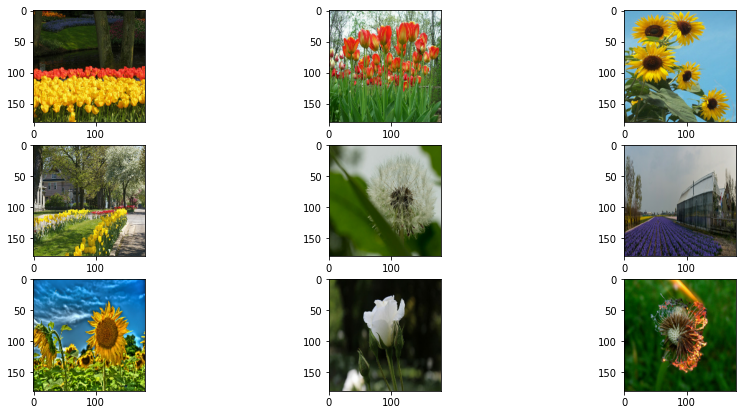

In [62]:
for img_batch,label_batch in train_ds.take(1):
  fig,ax=plt.subplots(3,3,figsize=(15,7))
  cnt=0
  for i in range(3):
    for j in range(3):
      ax[i,j].imshow(img_batch[cnt].numpy().astype('uint8'))
      #print(cnt)
      cnt+=1



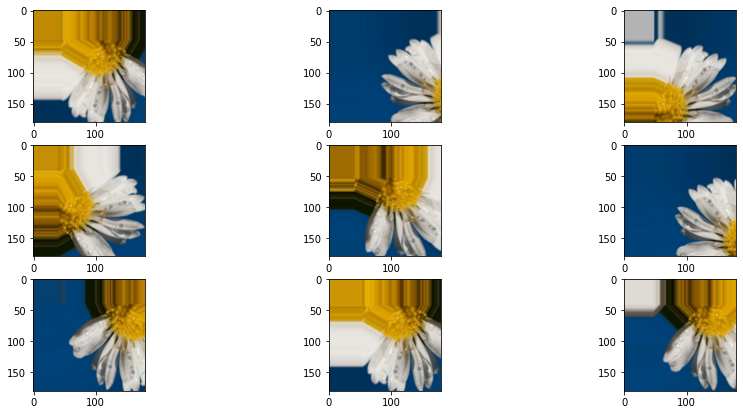

In [67]:
for img_batch,label_batch in train_ds.take(1):
  fig,ax=plt.subplots(3,3,figsize=(15,7))
  
  cnt=0
  for i in range(3):
    for j in range(3):
      img=data_aug(img_batch)
      ax[i,j].imshow(img[0].numpy().astype('uint8'))
      #print(cnt)
      cnt+=1



## Too much Augmentation , step by step

In [79]:
data_aug=Sequential([
                     tf.keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                    #  tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3),width_factor=(0.2, 0.3),fill_mode='nearest'),
                    #  tf.keras.layers.experimental.preprocessing.RandomRotation(factor=(-0.2, 0.3)),
                    #  tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=(0.2, 0.3),width_factor=(0.2, 0.3),fill_mode='nearest')

])

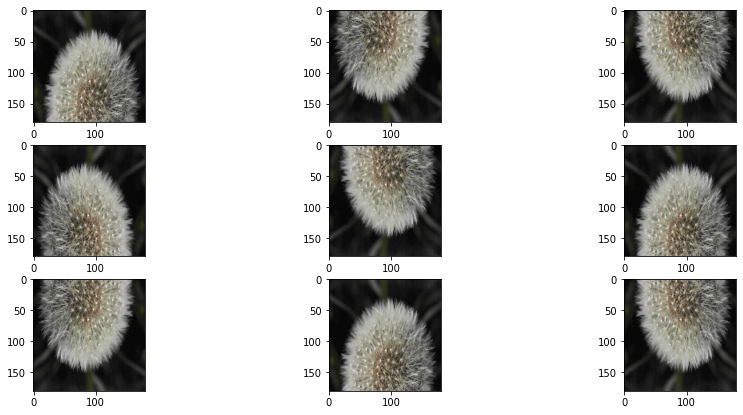

In [82]:
for img_batch,label_batch in train_ds.take(1):
  fig,ax=plt.subplots(3,3,figsize=(15,7))
  
  cnt=0
  for i in range(3):
    for j in range(3):
      img=data_aug(img_batch)
      ax[i,j].imshow(img[0].numpy().astype('uint8'))
      #print(cnt)
      cnt+=1



In [100]:
data_aug=Sequential([
                     tf.keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                     tf.keras.layers.experimental.preprocessing.RandomZoom(0.2,fill_mode='nearest'),
                     tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
                    #tf.keras.layers.experimental.preprocessing.RandomTranslation(0.1)

])

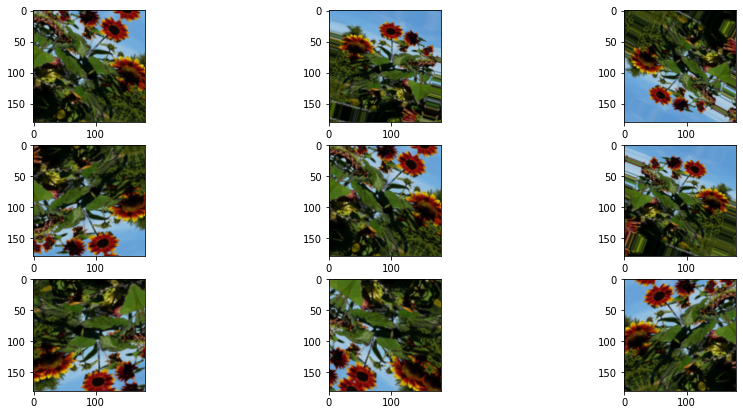

In [103]:
for img_batch,label_batch in train_ds.take(1):
  fig,ax=plt.subplots(3,3,figsize=(15,7))
  
  cnt=0
  for i in range(3):
    for j in range(3):
      img=data_aug(img_batch)
      ax[i,j].imshow(img[0].numpy().astype('uint8'))
      #print(cnt)
      cnt+=1



In [104]:
num_class=len(class_names)
model3=Sequential()
# model3.add(tf.keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal",input_shape=(img_height,img_width,3)))
# model3.add(tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3),width_factor=(0.2, 0.3),fill_mode='nearest'))
# model3.add(tf.keras.layers.experimental.preprocessing.RandomRotation(factor=(-0.2, 0.3)))
# model3.add(tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=(0.2, 0.3),width_factor=(0.2, 0.3),fill_mode='nearest'))
model3.add(data_aug)
model3.add(tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255) )
model3.add(Conv2D(16,(3,3),activation='relu'))
model3.add(MaxPool2D(2,2))
model3.add(Conv2D(32,(3,3),activation='relu'))
model3.add(MaxPool2D(2,2))
model3.add(Conv2D(64,(3,3),activation='relu'))
model3.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(512,activation='relu'))
model3.add(Dense(num_class))
model3.summary()
model3.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])
history=model3.fit(train_ds,validation_data=valid_ds,epochs=15)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_13 (Sequential)   (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 178, 178, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 87, 87, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 41, 41, 64)      

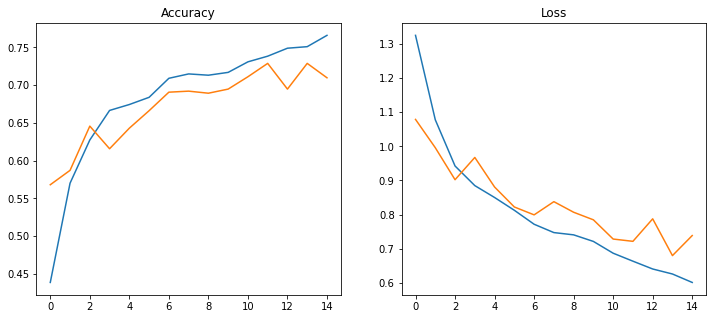

In [105]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
epochs=range(len(history.history['acc']))

ax[0].plot(epochs,history.history['acc'])
ax[0].plot(epochs,history.history['val_acc'])
ax[0].set_title('Accuracy')

ax[1].plot(epochs,history.history['loss'])
ax[1].plot(epochs,history.history['val_loss'])
ax[1].set_title('Loss')
plt.show()

## Much better, need to improve but good enuf for now

so learnings
- try sensible augmentation